# Hotel Booking Cancallation Prediction

**Load Data**

Load Hotel_Booking/hotel_bookings.csv file provided on Brightspace.

In [280]:
# First I would need to mount the drive and this is one way to do it
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [281]:
# Loading the data

import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Assessment 1/hotel_bookings.csv')

# 1. Data Pre-processing (30%)


---






**Drop irrelevant columns**

It will significantly reduce the time and effort you need to invest. As a general guideline, columns containing IDs, dates, or irrelevant information are typically considered redundant and offer little value for predictive analysis.

In [282]:
# checking what columns i have in the dataset
print (df.head())

          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1     

now to drop the columns i can use df.drop()

In [283]:
df.drop(columns = 'arrival_date_year', inplace= True)
df.drop(columns = 'arrival_date_month', inplace= True)
df.drop(columns = 'arrival_date_day_of_month', inplace= True)
df.drop(columns = 'required_car_parking_spaces', inplace= True)
df.drop(columns = 'reservation_status_date', inplace= True)
df.drop(columns = 'arrival_date_week_number', inplace= True)
# the reason for dropping the company column was that there was too many missing values.
df.drop(columns = 'company', inplace= True)
df.drop(columns = 'reservation_status', inplace= True)

In [284]:
# using df.head() again to check if it has dropped the columns. If it is not present, it will have been dropped
print (df.head())

          hotel  is_canceled  lead_time  stays_in_weekend_nights  \
0  Resort Hotel            0        342                        0   
1  Resort Hotel            0        737                        0   
2  Resort Hotel            0          7                        0   
3  Resort Hotel            0         13                        0   
4  Resort Hotel            0         14                        0   

   stays_in_week_nights  adults  children  babies meal country  ...  \
0                     0       2       0.0       0   BB     PRT  ...   
1                     0       2       0.0       0   BB     PRT  ...   
2                     1       1       0.0       0   BB     GBR  ...   
3                     1       1       0.0       0   BB     GBR  ...   
4                     2       2       0.0       0   BB     GBR  ...   

  previous_bookings_not_canceled reserved_room_type  assigned_room_type  \
0                              0                  C                   C   
1             

In [285]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1.1 Missing Values

Identify and handled missing values.

In [286]:
# identifying the missing values using isnull()
df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             488
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             16340
days_in_waiting_list                  0
customer_type                         0
adr                                   0
total_of_special_requests             0
dtype: int64

In [287]:
# from the above display you can see that the columns children,country, agent and company has missing values. so now i shall replace these values.

# for children, i will replace the missing values with the mean children value, as they are all filled with numbers

# inplace=True basically is what fills the missing data with something else and in this case i am using Mean.
mean_children = df['children'].mean()
df['children'].fillna(mean_children, inplace=True)
df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              0
babies                                0
meal                                  0
country                             488
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             16340
days_in_waiting_list                  0
customer_type                         0
adr                                   0
total_of_special_requests             0
dtype: int64

In [288]:
# for country, i will replace the missing values with the mode country value
mode_country = df['country'].mode().iloc[0]
df['country'].fillna(mode_country, inplace=True)
df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              0
babies                                0
meal                                  0
country                               0
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             16340
days_in_waiting_list                  0
customer_type                         0
adr                                   0
total_of_special_requests             0
dtype: int64

In [289]:
# replacing missing values of agent with the mean agent value
mean_agent = df['agent'].mean()
df['agent'].fillna(mean_agent, inplace=True)
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
total_of_special_requests         0
dtype: int64

## 1.2 Unique values

Find out unique values in columns. This will help you in identifying in-consistent data.

In [290]:
# To find out unique values, you can use .valuecounts()

print(df['hotel'].value_counts())
print(df['is_canceled'].value_counts())
print(df['lead_time'].value_counts())
print(df['stays_in_weekend_nights'].value_counts())
print(df['stays_in_week_nights'].value_counts())
print(df['adults'].value_counts())
print(df['children'].value_counts())
print(df['babies'].value_counts())
print(df['meal'].value_counts())
print(df['country'].value_counts())
print(df['market_segment'].value_counts())
print(df['distribution_channel'].value_counts())
print(df['is_repeated_guest'].value_counts())
print(df['previous_cancellations'].value_counts())
print(df['previous_bookings_not_canceled'].value_counts())
print(df['reserved_room_type'].value_counts())
print(df['assigned_room_type'].value_counts())
print(df['booking_changes'].value_counts())
print(df['deposit_type'].value_counts())
print(df['agent'].value_counts())
print(df['days_in_waiting_list'].value_counts())
print(df['customer_type'].value_counts())
print(df['adr'].value_counts())
print(df['total_of_special_requests'].value_counts())

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64
0    75166
1    44224
Name: is_canceled, dtype: int64
0      6345
1      3460
2      2069
3      1816
4      1715
       ... 
400       1
370       1
532       1
371       1
463       1
Name: lead_time, Length: 479, dtype: int64
0     51998
2     33308
1     30626
4      1855
3      1259
6       153
5        79
8        60
7        19
9        11
10        7
12        5
13        3
16        3
14        2
18        1
19        1
Name: stays_in_weekend_nights, dtype: int64
2     33684
1     30310
3     22258
5     11077
4      9563
0      7645
6      1499
10     1036
7      1029
8       656
9       231
15       85
11       56
19       44
12       42
20       41
14       35
13       27
16       16
21       15
22        7
25        6
18        6
30        5
17        4
24        3
40        2
33        1
42        1
50        1
32        1
26        1
34        1
35        1
41        1
Name: stays_in_week_nights, dtype

## 1.3 Removing Inconsistent values

Detecting inconsistencies can be achieved through a variety of methods. Some can be identified by examining unique values within each column, while others may require a solid understanding of the problem domain. Since you might not be an expert in the hotel or hospitality industry, here are some helpful hints:

Hints:

1. Check for incomplete bookings, such as reservations with zero adults, babies, or children.
2. Examine rows with zeros in both 'stays_in_weekend_nights' and 'stays_in_week_nights.'



In [291]:
# removing the incomplete bookings where there are 0 adults, children and babies
# I am going to be using df.shape to check if it has removed the incomplete bookings
print(df.shape)
df = df.drop(df[(df['adults']== 0) & (df['children']==0) & (df['babies']==0)].index)
print(df.shape)
# from using .value_counts() we can also see what data has been taken out
print(df['adults'].value_counts())
print(df['children'].value_counts())
print(df['babies'].value_counts())

(119390, 24)
(119210, 24)
2     89680
1     23027
3      6202
0       223
4        62
26        5
27        2
20        2
5         2
40        1
50        1
55        1
6         1
10        1
Name: adults, dtype: int64
0.00000     110616
1.00000       4861
2.00000       3652
3.00000         76
0.10389          4
10.00000         1
Name: children, dtype: int64
0     118293
1        900
2         15
10         1
9          1
Name: babies, dtype: int64


In [292]:
# removing the incomplete bookings where there are 0 weekend nights and week nights stayed
print(df.shape)
df = df.drop(df[(df['stays_in_weekend_nights']== 0) & (df['stays_in_week_nights']== 0)].index)
print(df.shape)
print(df['stays_in_weekend_nights'].value_counts())
print(df['stays_in_week_nights'].value_counts())

(119210, 24)
(118565, 24)
0     51250
2     33266
1     30615
4      1847
3      1252
6       152
5        77
8        58
7        19
9        10
10        7
12        5
13        2
16        2
18        1
19        1
14        1
Name: stays_in_weekend_nights, dtype: int64
2     33670
1     30292
3     22241
5     11068
4      9543
0      6927
6      1494
10     1030
7      1024
8       654
9       228
15       85
11       55
19       43
12       42
20       39
14       35
13       27
16       15
21       15
22        7
25        6
18        6
30        4
17        4
24        3
40        2
33        1
42        1
50        1
32        1
26        1
34        1
Name: stays_in_week_nights, dtype: int64


In [293]:
# here i am deleting the rows where customers have selected undefined for the distribution channel
df = df.drop(df[(df['distribution_channel']== "Undefined")].index)
print(df['distribution_channel'].value_counts())

TA/TO        97335
Direct       14451
Corporate     6584
GDS            190
Name: distribution_channel, dtype: int64


In [294]:
# now i am deleting the rows where customers have selected undefined for the market segment
df = df.drop(df[(df['market_segment']== "Undefined")].index)
print(df['market_segment'].value_counts())

Online TA        56128
Offline TA/TO    24049
Groups           19759
Direct           12447
Corporate         5231
Complementary      715
Aviation           231
Name: market_segment, dtype: int64


# 2. Exploratory Data Analysis (15%)


---





You've also been provided with examples of valuable insights that could be of interest to hotel management, including:

* Calculating cancellation percentages for City and Resort hotels.
* Identifying the most frequently ordered meal types.
* Determining the number of returning guests.
* Discovering the most booked room types.
* Exploring correlations between room types and cancellations.
* Identifying the most common customer types.

Visualize these insights using three different types of visualizations covered in the practicals, such as:

* Bar graphs
* Pie charts
* Line charts

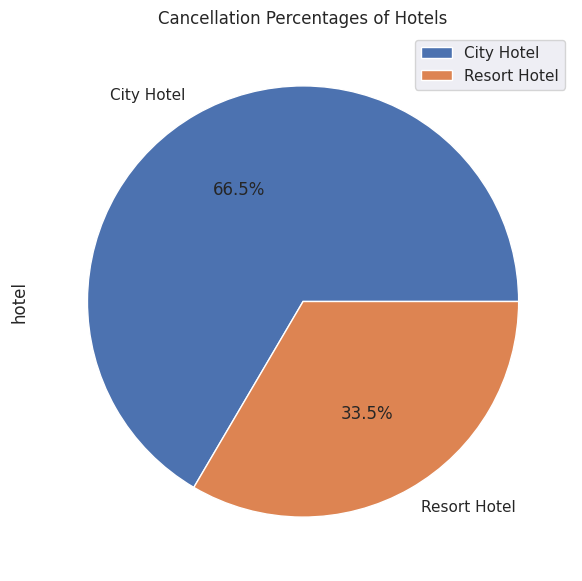

In [295]:
# Calculate cancellation percentages for City and Resort hotels
# I will be using a pie chart because it is great for showing percentages
cancellation_percentages = df['hotel'].value_counts('is_canceled').plot(kind= 'pie',title = "Cancellation Percentages of Hotels", autopct = '%1.1f%%', legend = True,  figsize= (8,7));

Axes(0.125,0.11;0.775x0.77)


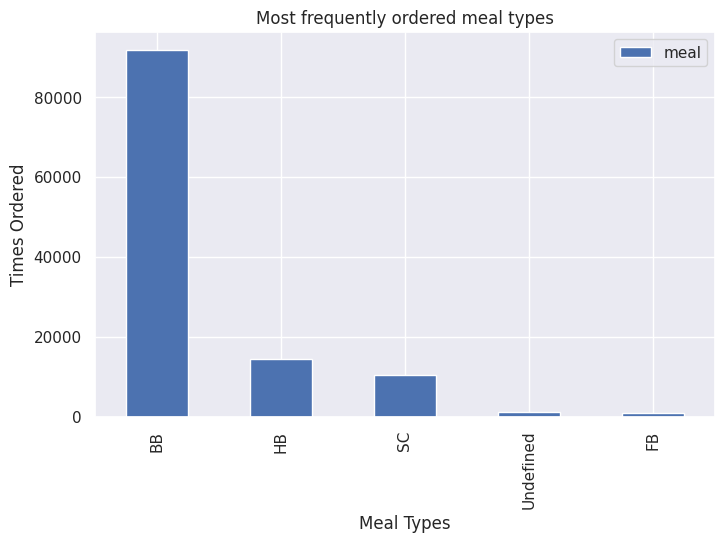

In [296]:
# Identifying the most frequently ordered meal types.
most_freq_meal = df['meal'].value_counts().plot(kind='bar', title="Most frequently ordered meal types", figsize=(8,5), legend= True);
most_freq_meal.set_xlabel("Meal Types")
most_freq_meal.set_ylabel("Times Ordered")
print(most_freq_meal)

Text(0.5, 0, 'Guests')

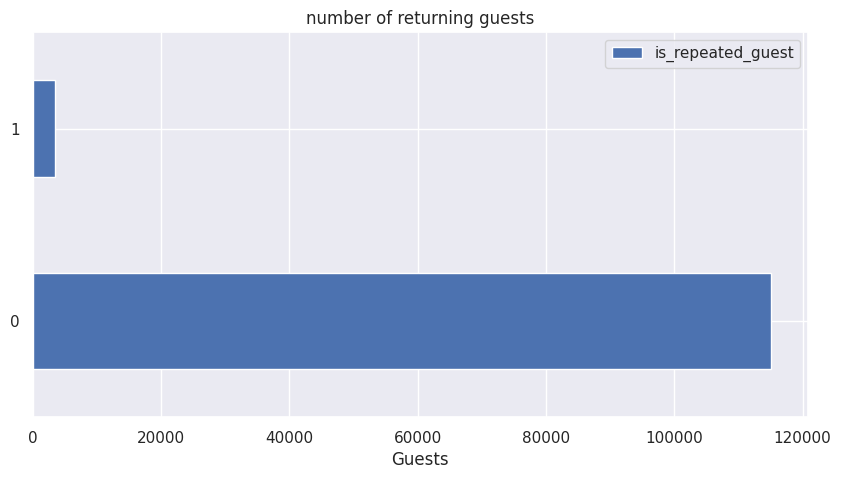

In [297]:
# Determining the number of returning guests.

num_return_guests = df['is_repeated_guest'].value_counts().plot(kind='barh', title="number of returning guests", figsize=(10,5), legend= True);
num_return_guests.set_xlabel("Guests")

Axes(0.125,0.11;0.775x0.77)


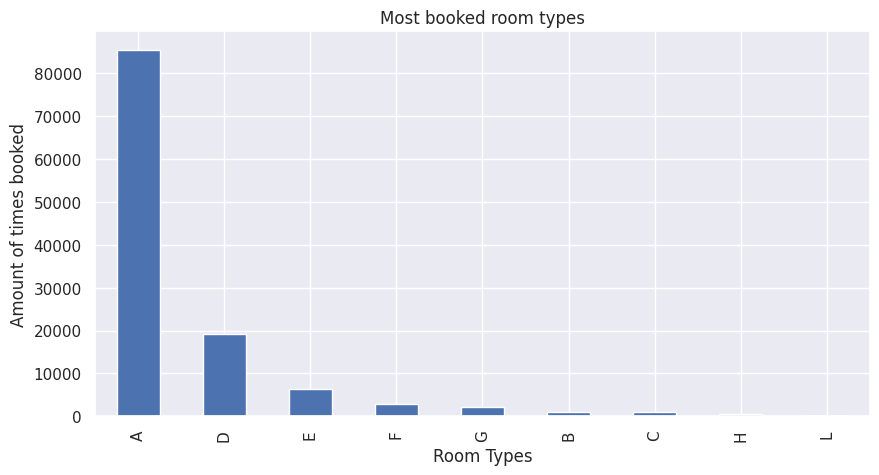

In [298]:
# Discovering the most booked room types
most_booked_room = df['reserved_room_type'].value_counts().plot(kind='bar', title="Most booked room types", figsize=(10,5));
most_booked_room.set_xlabel("Room Types")
most_booked_room.set_ylabel("Amount of times booked")
print(most_booked_room)

Text(0, 0.5, 'Cancellations')

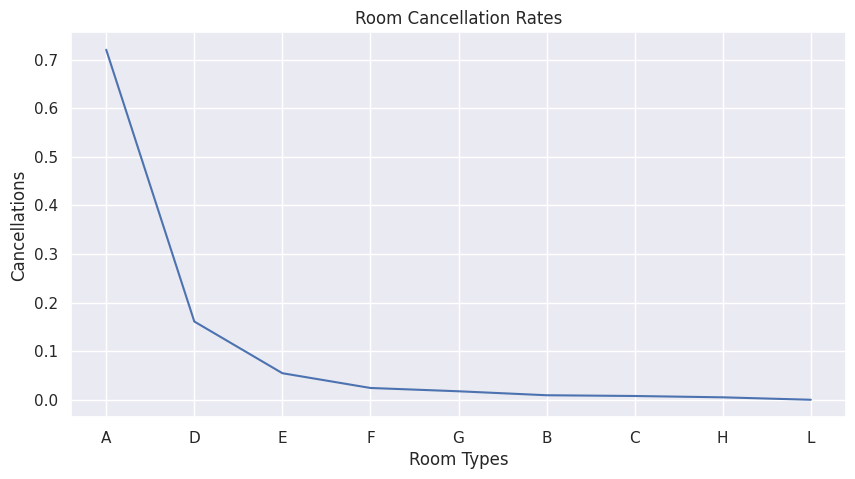

In [299]:
# Exploring correlations between room types and cancellations

room_cancellation_rates = df['reserved_room_type'].value_counts('is_canceled').plot(kind='line', title="Room Cancellation Rates", figsize=(10,5))
room_cancellation_rates.set_xlabel("Room Types")
room_cancellation_rates.set_ylabel("Cancellations")

Axes(0.175625,0.11;0.67375x0.77)


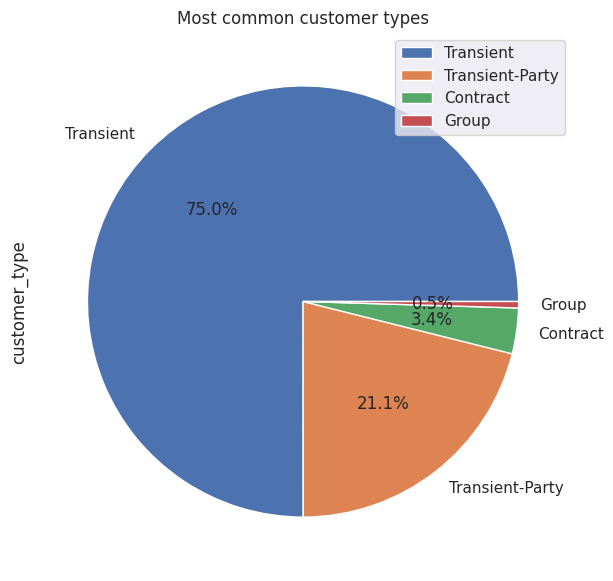

In [300]:
# identifying the most common customer types
most_com_cust = df['customer_type'].value_counts().plot(kind='pie', title="Most common customer types", autopct = '%1.1f%%', legend = True,  figsize= (8,7));

print(most_com_cust)

<Axes: title={'center': 'Most common countries'}, ylabel='country'>

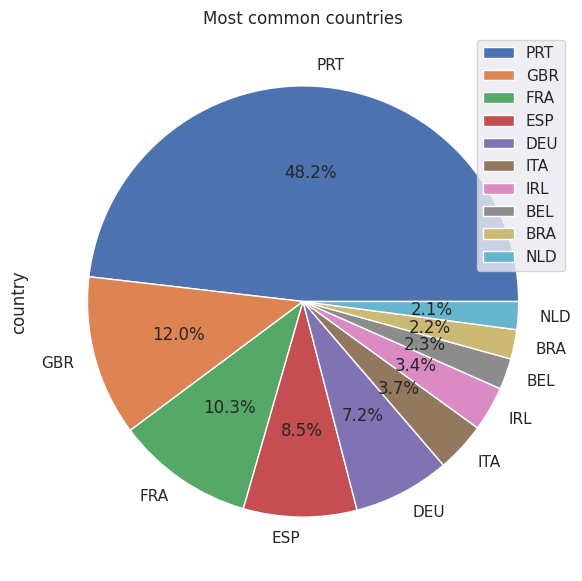

In [301]:
# identifying the most common countries that customers come from

# Getting the top 10 most common countries
most_com_country = df['country'].value_counts().head(10)
most_com_country.plot(kind='pie', title="Most common countries", autopct='%1.1f%%', legend = True, figsize= (8,7))


# 3. Feature Engineering (25%)


---





Apply various feature engineering techniques, covered in the lectures and practicles.

Hint:

* Binning
* Encoding
* **Outlier identification and handling**
* Variance, Covariance, Correlation, Correlation Heapmap
* Scaling

**Binning**

In [302]:
# for binning i have sperated the country data in three bins with the labels low, medium and high frequency
# This would be for 0, 10 and 50

bins = [0, 10, 50, float('inf')]
labels = ['Low Frequency', 'Medium Frequency', 'High Frequency']
df['country_frequency'] = pd.cut(df['country'].map(df['country'].value_counts()), bins=bins, labels=labels)
df = pd.get_dummies(df, columns=['country_frequency'], prefix=['country_frequency'])

**Encoding**

In [303]:
# first i need to check which columns are categorical
# using df.info() to check which columns are categorical

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118560 entries, 2 to 119389
Data columns (total 27 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   hotel                               118560 non-null  object 
 1   is_canceled                         118560 non-null  int64  
 2   lead_time                           118560 non-null  int64  
 3   stays_in_weekend_nights             118560 non-null  int64  
 4   stays_in_week_nights                118560 non-null  int64  
 5   adults                              118560 non-null  int64  
 6   children                            118560 non-null  float64
 7   babies                              118560 non-null  int64  
 8   meal                                118560 non-null  object 
 9   country                             118560 non-null  object 
 10  market_segment                      118560 non-null  object 
 11  distribution_channel      

In [304]:
# To encode we need to convert categorical data to numerical data and we can do this by using cat.codes
df['hotel'] = df['hotel'].astype('category')
df['hotel'] = df['hotel'].cat.codes

df['meal'] = df['meal'].astype('category')
df['meal'] = df['meal'].cat.codes

df['country'] = df['country'].astype('category')
df['country'] = df['country'].cat.codes

df['market_segment'] = df['market_segment'].astype('category')
df['market_segment'] = df['market_segment'].cat.codes

df['distribution_channel'] = df['distribution_channel'].astype('category')
df['distribution_channel'] = df['distribution_channel'].cat.codes

df['reserved_room_type'] = df['reserved_room_type'].astype('category')
df['reserved_room_type'] = df['reserved_room_type'].cat.codes

df['assigned_room_type'] = df['assigned_room_type'].astype('category')
df['assigned_room_type'] = df['assigned_room_type'].cat.codes

df['deposit_type'] = df['deposit_type'].astype('category')
df['deposit_type'] = df['deposit_type'].cat.codes

df['customer_type'] = df['customer_type'].astype('category')
df['customer_type'] = df['customer_type'].cat.codes

In [305]:
# now checking again to see if it has converted the categorical data to nominal data.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118560 entries, 2 to 119389
Data columns (total 27 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   hotel                               118560 non-null  int8   
 1   is_canceled                         118560 non-null  int64  
 2   lead_time                           118560 non-null  int64  
 3   stays_in_weekend_nights             118560 non-null  int64  
 4   stays_in_week_nights                118560 non-null  int64  
 5   adults                              118560 non-null  int64  
 6   children                            118560 non-null  float64
 7   babies                              118560 non-null  int64  
 8   meal                                118560 non-null  int8   
 9   country                             118560 non-null  int16  
 10  market_segment                      118560 non-null  int8   
 11  distribution_channel      

**Outlier Identification and Handling**

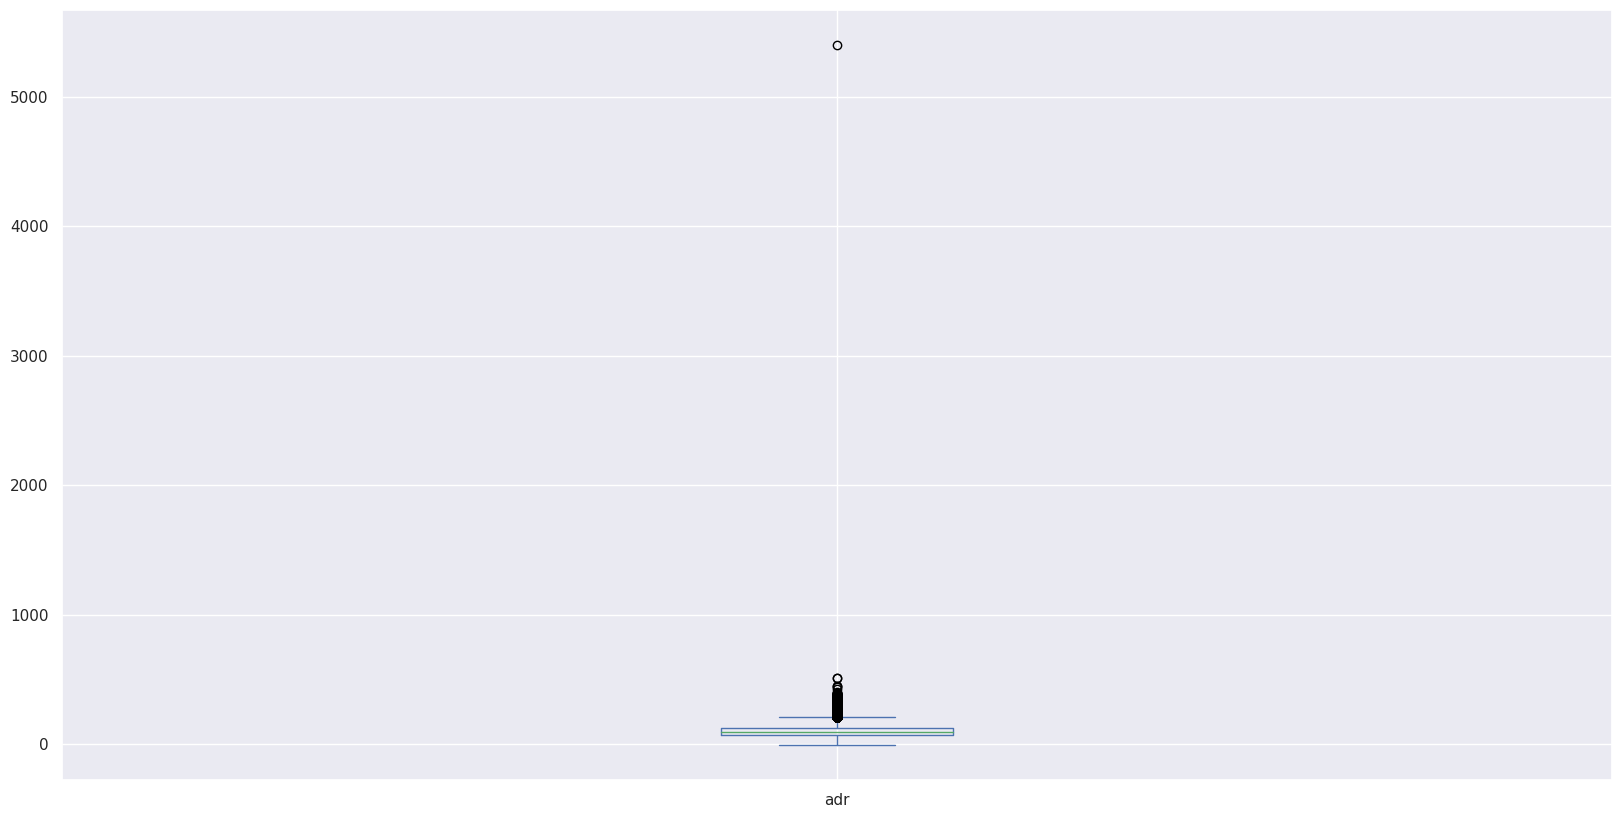

In [306]:
# for this we can use the box plot function to see the outliers.
df.plot(y=['adr'], kind='box');

In [307]:
# now we can remove the outliers from this

import matplotlib.pyplot as plt
import numpy as np

print(np.where(df['adr']>200))

# Identifying outliers in the 'adr' column using the IQR method
Q1 = df['adr'].quantile(0.25)
Q3 = df['adr'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Handling outliers by filtering the dataframe
delete_outliers = df[(df['adr'] >= lower_bound) & (df['adr'] <= upper_bound)]

# now checking the shape of the dataframe after handling outliers
print(delete_outliers.shape)


(array([   138,    162,    297, ..., 118546, 118552, 118556]),)
(114669, 27)


**Variance, Covariance, Correlation, Correlation Heapmap**

In [308]:
# variance of all the columns- this is the measure of how much the data for a variable varies from its mean.
df.var(numeric_only=None)

hotel                                     0.222630
is_canceled                               0.233764
lead_time                             11431.062339
stays_in_weekend_nights                   0.990952
stays_in_week_nights                      3.584465
adults                                    0.331135
children                                  0.159296
babies                                    0.009518
meal                                      1.138632
country                                1996.041148
market_segment                            1.597494
distribution_channel                      0.819233
is_repeated_guest                         0.028642
previous_cancellations                    0.717731
previous_bookings_not_canceled            2.252192
reserved_room_type                        2.873904
assigned_room_type                        3.398125
booking_changes                           0.406586
deposit_type                              0.112684
agent                          

In [309]:
# The piece of code below is to show the variance of a specific column and in this case it is for the 'lead_time' column
df['lead_time'].var()

11431.062338689973

In [310]:
# To show the covariance between each column, you would simply put df.cov()
# covariance between 'lead_time' and 'stays_in_week_nights'
df['lead_time'].cov(df['stays_in_week_nights'])

33.025910627325764

In [311]:
# Showing the correlation between each column
df.corr()

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,total_of_special_requests,country_frequency_Low Frequency,country_frequency_Medium Frequency,country_frequency_High Frequency
hotel,1.000000,-0.135618,-0.074986,0.191706,0.241865,0.011068,0.044172,0.043824,-0.006004,0.044935,...,0.076516,-0.158990,0.719164,-0.072591,-0.047943,-0.094030,0.043959,-0.013039,-0.024757,0.028019
is_canceled,-0.135618,1.000000,0.291570,-0.004844,0.020712,0.057549,0.004705,-0.032670,-0.017418,0.272115,...,-0.145191,0.468274,-0.077328,0.053948,-0.068970,0.039436,-0.236206,-0.008982,0.018899,-0.012056
lead_time,-0.074986,0.291570,1.000000,0.082913,0.163155,0.117006,-0.038285,-0.021038,0.001377,0.055083,...,0.001210,0.375232,-0.065035,0.169902,0.072843,-0.073564,-0.096969,-0.013437,-0.035331,0.037437
stays_in_weekend_nights,0.191706,-0.004844,0.082913,1.000000,0.490975,0.093909,0.045958,0.018681,0.044525,-0.126241,...,0.051161,-0.113924,0.134641,-0.055164,-0.111229,0.040956,0.072956,0.003488,0.012514,-0.012633
stays_in_week_nights,0.241865,0.020712,0.163155,0.490975,1.000000,0.095047,0.044442,0.020499,0.035514,-0.117862,...,0.081639,-0.080177,0.174243,-0.002924,-0.130352,0.053181,0.068507,0.001832,0.007990,-0.007872
adults,0.011068,0.057549,0.117006,0.093909,0.095047,1.000000,0.028884,0.017753,0.032171,-0.109053,...,-0.041314,-0.030277,-0.029267,-0.008578,-0.102685,0.224493,0.122928,-0.002402,-0.002919,0.003730
children,0.044172,0.004705,-0.038285,0.045958,0.044442,0.028884,1.000000,0.024183,-0.049684,-0.039132,...,0.051320,-0.096612,0.039324,-0.033403,-0.053694,0.328612,0.081956,0.008693,0.014178,-0.016650
babies,0.043824,-0.032670,-0.021038,0.018681,0.020499,0.017753,0.024183,1.000000,0.002980,0.005482,...,0.086212,-0.030577,0.033450,-0.010650,-0.016158,0.029410,0.097882,-0.000395,0.000009,0.000187
meal,-0.006004,-0.017418,0.001377,0.044525,0.035514,0.032171,-0.049684,0.002980,1.000000,-0.090738,...,0.020522,-0.092128,-0.046585,-0.007198,0.044584,0.062508,0.024040,0.002833,0.015707,-0.015095
country,0.044935,0.272115,0.055083,-0.126241,-0.117862,-0.109053,-0.039132,0.005482,-0.090738,1.000000,...,-0.043198,0.326365,0.059439,0.061093,0.027378,-0.109724,-0.166144,-0.006832,-0.000443,0.003754


<Axes: >

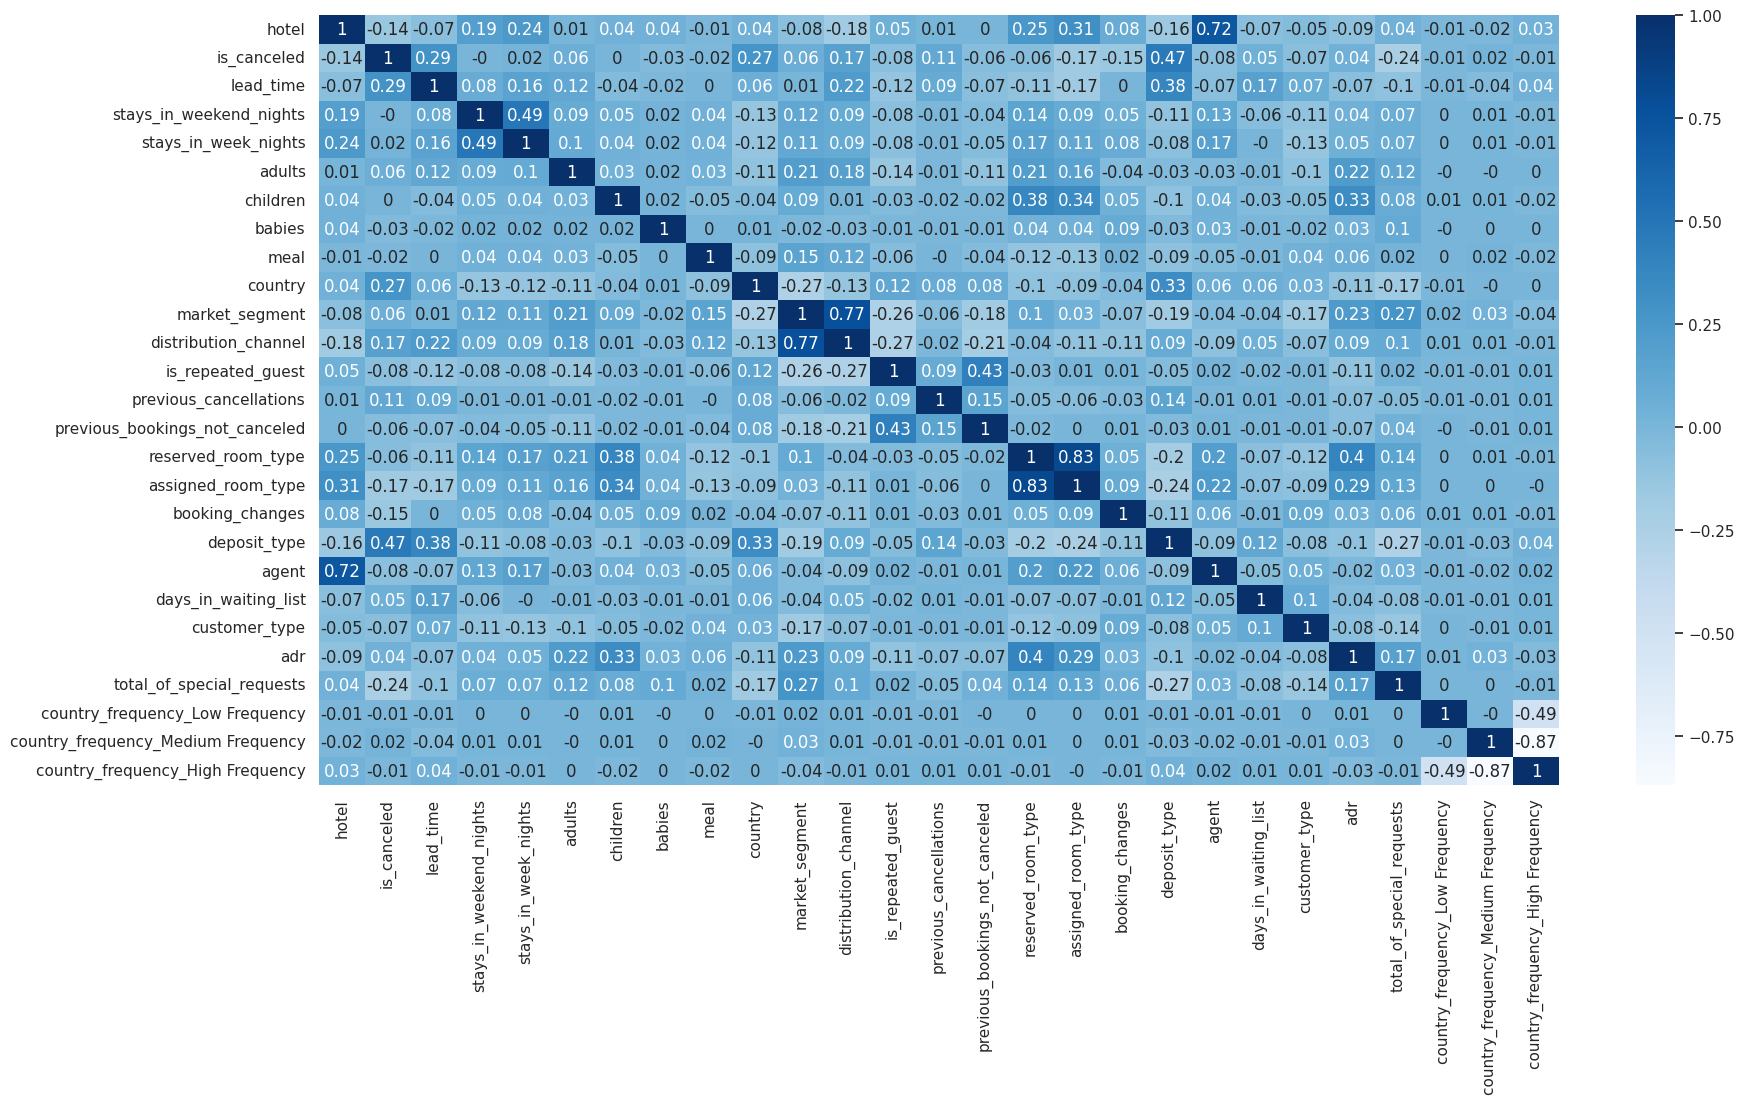

In [312]:
# Correlation heapmap

import seaborn as sb
corr = df.corr().round(2)
sb.set (rc = {'figure.figsize':(20, 10)})
sb.heatmap(corr, cmap="Blues", annot=True)

**Analysis of the correlation heapmap**

This correlation Heapmap shows the same thing as df.corr() but in a visualisation format as this is easier to analyse. Straight away from looking at it i can say that the hotel type that is booked dpends on what agent you are booking from as the correlation is 0.72 and this is pretty high. I can also see that the previous bookings not cancelled is also correlated to if the customer was a repeated guest or not and what the heapmap shows, is that if it is a repeated guest, they are the bookings that are less likely to get cancelled.

for things like this, a correlation heapmap is very useful for quickly singling out any relations to things for example the assignment is for working out cancellations for the hotels and this is very useful because the colours do a good job in quickly identifying things that are correlated.

**Scaling**

In [313]:
# min max scaling

from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()

df_min_max = df.copy()

df_min_max = pd.DataFrame(minmax_scaler.fit_transform(df_min_max.values),columns=df_min_max.columns, index=df_min_max.index)

print("Scaled Dataset Using Min Max Scaler")
df_min_max.head()

Scaled Dataset Using Min Max Scaler


,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,total_of_special_requests,country_frequency_Low Frequency,country_frequency_Medium Frequency,country_frequency_High Frequency
2,1.0,0.0,0.009873,0.0,0.02,0.018182,0.0,0.0,0.0,0.335227,...,0.0,0.0,0.160474,0.0,0.666667,0.015053,0.0,0.0,0.0,1.0
3,1.0,0.0,0.018336,0.0,0.02,0.018182,0.0,0.0,0.0,0.335227,...,0.0,0.0,0.567416,0.0,0.666667,0.015053,0.0,0.0,0.0,1.0
4,1.0,0.0,0.019746,0.0,0.04,0.036364,0.0,0.0,0.0,0.335227,...,0.0,0.0,0.447566,0.0,0.666667,0.019307,0.2,0.0,0.0,1.0
5,1.0,0.0,0.019746,0.0,0.04,0.036364,0.0,0.0,0.0,0.335227,...,0.0,0.0,0.447566,0.0,0.666667,0.019307,0.2,0.0,0.0,1.0
6,1.0,0.0,0.000000,0.0,0.04,0.036364,0.0,0.0,0.0,0.767045,...,0.0,0.0,0.160474,0.0,0.666667,0.020972,0.0,0.0,0.0,1.0


In [314]:
# Standard Scaling

from sklearn.preprocessing import StandardScaler

df_std = df.copy()
std_scaler = StandardScaler()

df_std = pd.DataFrame(std_scaler.fit_transform(df_std.values), columns=df_std.columns, index=df_std.index)

print("Scaled Dataset Using StandardScaler")
df_std.head()

Scaled Dataset Using StandardScaler


,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,total_of_special_requests,country_frequency_Low Frequency,country_frequency_Medium Frequency,country_frequency_High Frequency
2,1.410331,-0.770588,-0.912020,-0.936343,-0.799042,-1.494497,-0.261056,-0.081612,-0.519418,-0.760007,...,-0.342468,-0.374662,0.001463,-0.13224,-0.238337,-0.550476,-0.720935,-0.048567,-0.086376,0.099272
3,1.410331,-0.770588,-0.855901,-0.936343,-0.799042,-1.494497,-0.261056,-0.081612,-0.519418,-0.760007,...,-0.342468,-0.374662,2.112547,-0.13224,-0.238337,-0.550476,-0.720935,-0.048567,-0.086376,0.099272
4,1.410331,-0.770588,-0.846548,-0.936343,-0.270853,0.243300,-0.261056,-0.081612,-0.519418,-0.760007,...,-0.342468,-0.374662,1.490801,-0.13224,-0.238337,-0.090516,0.539670,-0.048567,-0.086376,0.099272
5,1.410331,-0.770588,-0.846548,-0.936343,-0.270853,0.243300,-0.261056,-0.081612,-0.519418,-0.760007,...,-0.342468,-0.374662,1.490801,-0.13224,-0.238337,-0.090516,0.539670,-0.048567,-0.086376,0.099272
6,1.410331,-0.770588,-0.977492,-0.936343,-0.270853,0.243300,-0.261056,-0.081612,-0.519418,0.941096,...,-0.342468,-0.374662,0.001463,-0.13224,-0.238337,0.089469,-0.720935,-0.048567,-0.086376,0.099272


# 4. Classifier Training (20%)


---


Utilize the sklearn Python library to train a decision tree classifier. Your process should start with splitting your dataset into predictor features (X) and a target feature (y). Next, divide the data into 70% training and 30% testing subsets. Train and test your data on the original dataset, a normalized dataset, and a standardized dataset. Aim to achieve a decision tree classifier with at least 70% accuracy.

In [315]:
# Load libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
from sklearn import preprocessing
import pandas as pd

In [316]:
# data Split
X = df.drop(columns= "is_canceled")
y = df["is_canceled"]

#Normalised Data
normalized_X = preprocessing.normalize(X)
# Standardised Data
standardized_X = preprocessing.scale(X)
#encode categorical data into digits
y = pd.get_dummies(y)
print(y.head())

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
stratify=y, random_state=1)

   0  1
2  1  0
3  1  0
4  1  0
5  1  0
6  1  0


In [317]:
# Building the decision tree model
# Create Decision Tree classifier object
dt = DecisionTreeClassifier()
# Train Decision Tree Classifier
dt = dt.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = dt.predict(X_test)
#accuracy
data_accuracy = metrics.accuracy_score(y_test, y_pred)
############# Using Normal Data ###############
# decision tree construction
dt = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=1)
dt= dt.fit(X_train, y_train)
#prediction
y_pred = dt.predict(X_test)
#accuracy
data_accuracy = metrics.accuracy_score(y_test, y_pred)
print("Data Accuracy:",data_accuracy)
############# Using Normalised Data ###############
# train test split
X_train, X_test, y_train, y_test = train_test_split(normalized_X, y,test_size=0.3, stratify=y, random_state=1)
# decision tree construction
dt = DecisionTreeClassifier(criterion = 'entropy', random_state=1)
dt= dt.fit(X_train, y_train)
#prediction
y_pred = dt.predict(X_test)
#accuracy
data_accuracy = metrics.accuracy_score(y_test, y_pred)
print("Normalised data Accuracy:",data_accuracy)
############## Using Standardised Data ##############
# train test split
X_train, X_test, y_train, y_test = train_test_split(standardized_X, y,test_size=0.3,stratify=y, random_state=1)
# decision tree construction
dt = DecisionTreeClassifier(criterion = 'entropy', random_state=1)
dt= dt.fit(X_train, y_train)
#prediction
y_pred = dt.predict(X_test)
#accuracy
data_accuracy = metrics.accuracy_score(y_test, y_pred)
print("Standardised Accuracy:",data_accuracy)

Data Accuracy: 0.7484536662168241
Normalised data Accuracy: 0.8257422402159245
Standardised Accuracy: 0.840080971659919


In [318]:
# classification report

print(metrics.classification_report(y_test, y_pred, digits=2,output_dict=False))


              precision    recall  f1-score   support

           0       0.88      0.87      0.87     22316
           1       0.78      0.79      0.79     13252

   micro avg       0.84      0.84      0.84     35568
   macro avg       0.83      0.83      0.83     35568
weighted avg       0.84      0.84      0.84     35568
 samples avg       0.84      0.84      0.84     35568



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


What the above classification report shows is that the model performs well as the scores for precision, recall and f1-score are high

# 5. Feature Importance (10%)


---

Assess the importance of features within your decision tree model. Provide commentary on the reliability of your model's results based on the feature importance scores.

In [319]:
# Variable importance in classifier
print("Variable importance in the classifier.")
pd.concat((pd.DataFrame(df.iloc[:, 1:].columns, columns = ['variable']),pd.DataFrame(dt.feature_importances_, columns = ['importance'])), axis = 1).sort_values(by='importance', ascending = False)[:20]


Variable importance in the classifier.


,variable,importance
17,deposit_type,0.195696
1,lead_time,0.166488
21,adr,0.125409
8,country,0.082663
9,market_segment,0.078230
18,agent,0.074564
3,stays_in_week_nights,0.045014
22,total_of_special_requests,0.042311
2,stays_in_weekend_nights,0.028301
20,customer_type,0.027837


**Feature Importance Analysis**  

From looking at the variable importance, the top variables and there importance scores are:

Deposit Type: 19.57%
Lead Time: 16.65%
ADR: 12.54%
Country: 8.27%
Market Segment: 7.82%   

what this basically shows, is that the variables such as deposit type, lead time and adr have the highest impact in influencing the models predictions for how many times the hotels are cancelled.

In [320]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7484536662168241


The accuracy that I have got over here shows that my decision tree classifier is accurate and that i have achieved what was set out in the assignment as i have gone over 70%